<a href="https://colab.research.google.com/github/mn22abk/DSProjectHamza2024/blob/main/DSPHamzafileIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
!pip install arch
from arch import arch_model
!pip install ta
import ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6cb6e5c2b458a38ced3ec93dc88c6560109cf53e2e72be41ed5127d8c6ad7179
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [2]:
# Load the data
df = pd.read_csv('prices-split-adjusted.csv')

In [4]:
# Convert date column to datetime, handling different formats
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
# Drop rows with invalid dates
df.dropna(subset=['date'], inplace=True)


In [8]:
# Remove duplicate dates by taking the first occurrence
df = df.drop_duplicates(subset=['date'], keep='first')

In [9]:
# Ensure the date index is sorted
df.sort_values('date', inplace=True)


In [10]:
# Set date as index
df.set_index('date', inplace=True)

In [11]:
# Set frequency to business days
df = df.asfreq('B')


In [12]:
# Exploratory Data Analysis
def plot_close_price(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['close'], label='Close Price')
    plt.title('Close Price Time Series')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

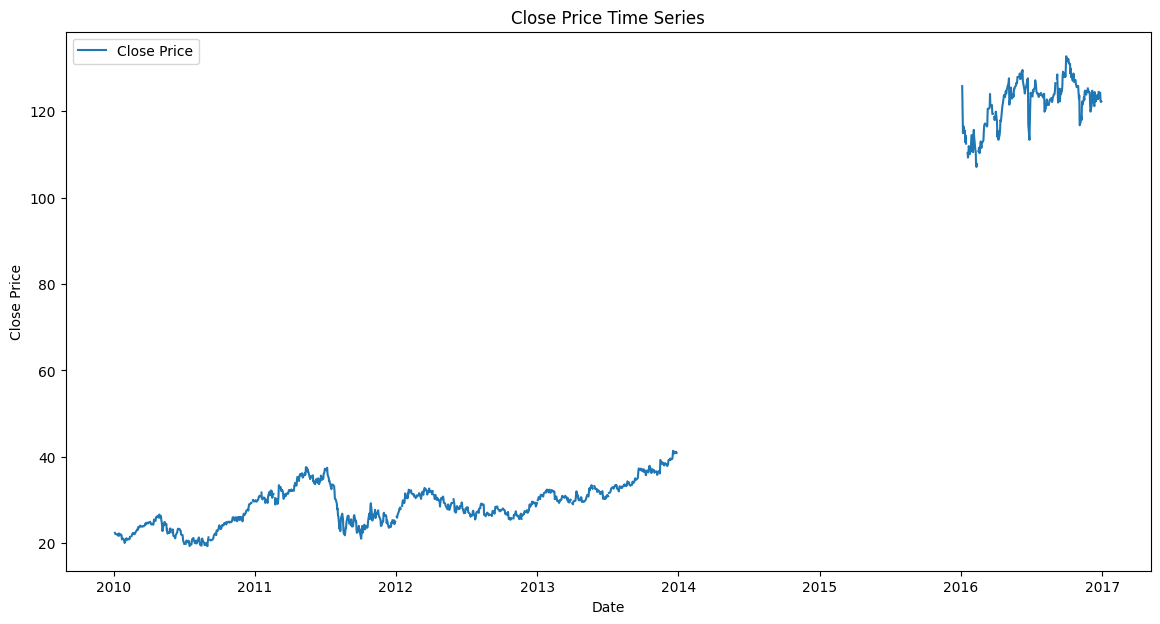

In [13]:

# Plot the closing price
plot_close_price(df)

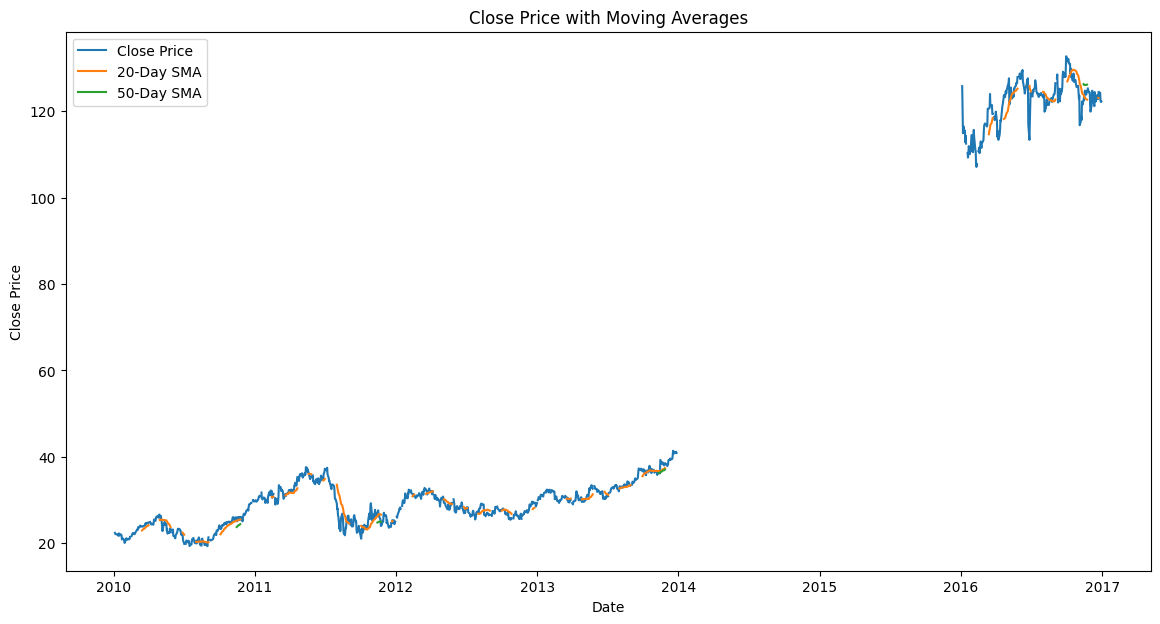

In [14]:
# Calculate and plot moving averages
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

def plot_moving_averages(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['close'], label='Close Price')
    plt.plot(df['SMA_20'], label='20-Day SMA')
    plt.plot(df['SMA_50'], label='50-Day SMA')
    plt.title('Close Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

plot_moving_averages(df)

In [15]:
# Technical Analysis
# Calculate RSI
df['RSI'] = ta.momentum.rsi(df['close'], window=14)

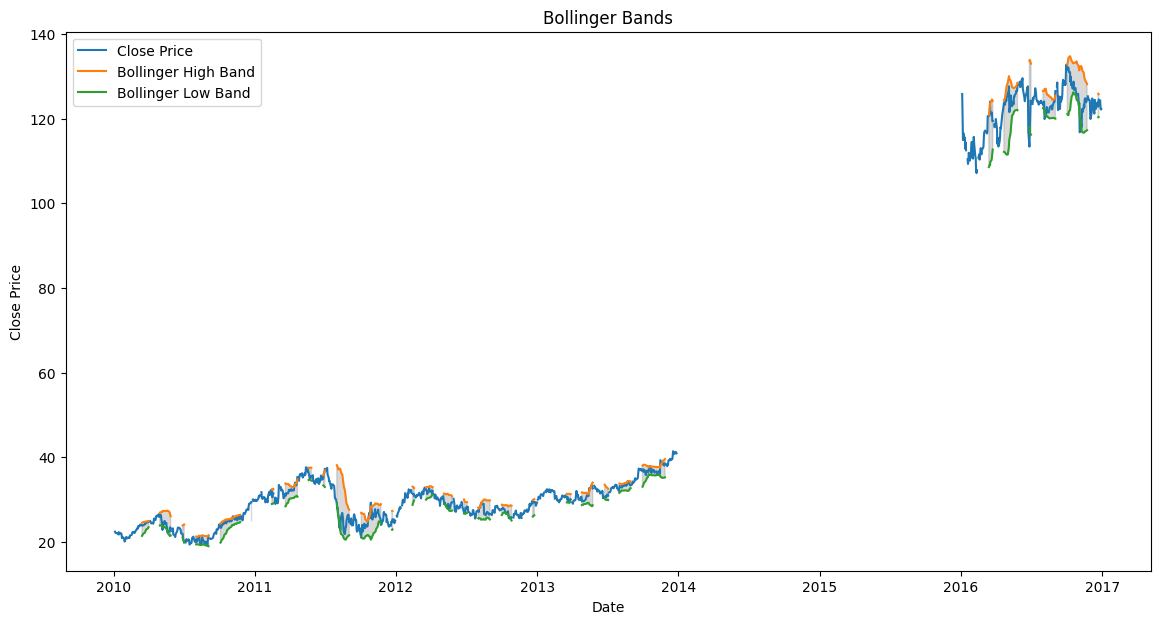

In [16]:
# Calculate Bollinger Bands
bb_indicator = ta.volatility.BollingerBands(df['close'], window=20, window_dev=2)
df['BB_High'] = bb_indicator.bollinger_hband()
df['BB_Low'] = bb_indicator.bollinger_lband()

def plot_bollinger_bands(df):
    plt.figure(figsize=(14, 7))
    plt.plot(df['close'], label='Close Price')
    plt.plot(df['BB_High'], label='Bollinger High Band')
    plt.plot(df['BB_Low'], label='Bollinger Low Band')
    plt.fill_between(df.index, df['BB_Low'], df['BB_High'], color='gray', alpha=0.3)
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

plot_bollinger_bands(df)

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1825
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1725.483
Date:                Fri, 16 Aug 2024   AIC                           3462.966
Time:                        12:22:47   BIC                           3496.019
Sample:                    01-04-2010   HQIC                          3475.159
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0187      0.013     -1.412      0.158      -0.045       0.007
ar.L2         -0.0729      0.016     -4.586      0.000      -0.104      -0.042
ar.L3         -0.0174      0.017     -1.048      0.2

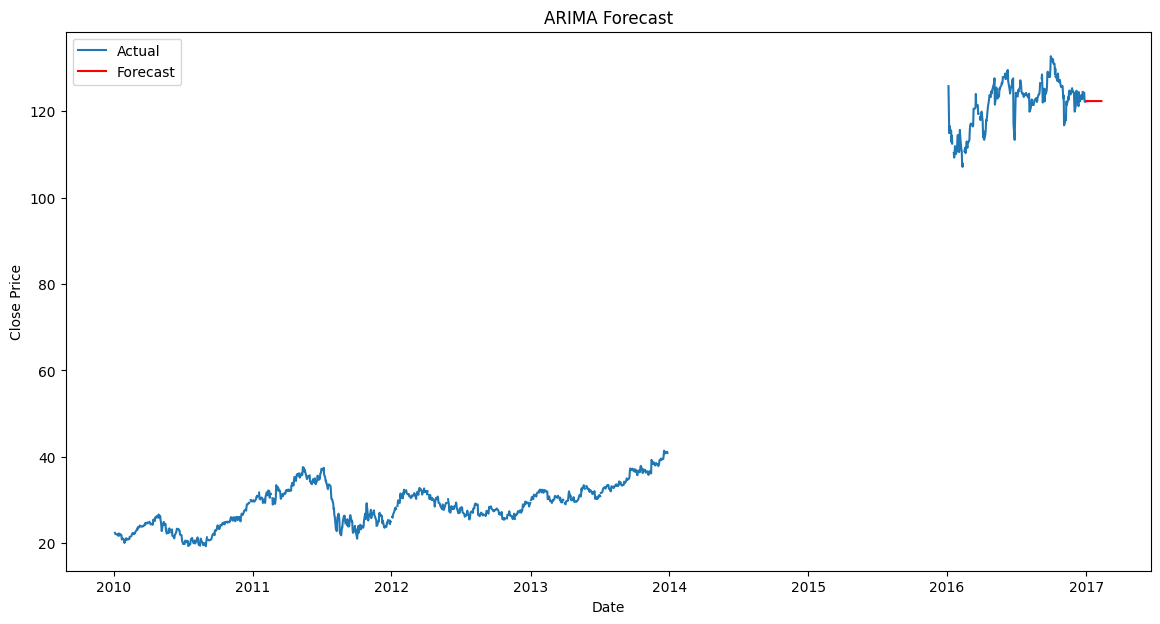

In [17]:
# Predictive Modeling using ARIMA
def arima_forecast(df):
    # Fit ARIMA model
    model = ARIMA(df['close'], order=(5, 1, 0))
    model_fit = model.fit()
    print(model_fit.summary())

    # Forecast
    forecast = model_fit.forecast(steps=30)
    plt.figure(figsize=(14, 7))
    plt.plot(df['close'], label='Actual')
    plt.plot(forecast, label='Forecast', color='red')
    plt.title('ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

arima_forecast(df)

In [18]:
# Volatility Modeling using GARCH
def garch_forecast(df):
    # Rescale returns
    returns = df['close'].pct_change().dropna()
    scaled_returns = returns * 100  # Scaling returns

    # Fit GARCH model
    garch = arch_model(scaled_returns, vol='Garch', p=1, q=1)
    garch_fit = garch.fit(disp='off')
    print(garch_fit.summary())



garch_forecast(df)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5556.35
Distribution:                  Normal   AIC:                           11120.7
Method:            Maximum Likelihood   BIC:                           11142.7
                                        No. Observations:                 1824
Date:                Fri, Aug 16 2024   Df Residuals:                     1823
Time:                        12:26:09   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0914  7.960e-02      1.148      0.251 [-6.46

<ipython-input-18-204c7734d200>:4: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df['close'].pct_change().dropna()
